In [368]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [369]:
earning_df = pd.read_csv("./data/google_earnings.csv")
print(earning_df.head())


  Symbol        Company          Earnings Date  EPS Estimate  Reported EPS  \
0  GOOGL   Alphabet Inc  Oct 27, 2025, 4 PMEDT           NaN           NaN   
1  GOOGL   Alphabet Inc  Jul 21, 2025, 4 PMEDT           NaN           NaN   
2  GOOGL   Alphabet Inc  Apr 23, 2025, 4 PMEDT           NaN           NaN   
3  GOOGL   Alphabet Inc  Jan 28, 2025, 4 PMEST          2.12           NaN   
4  GOOGL  Alphabet Inc.  Oct 29, 2024, 4 PMEDT          1.85          2.12   

   Surprise(%)  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4        14.91  


In [370]:
earning_array = earning_df.values
earning_df[:2]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN


In [371]:
earning_df_from_array = pd.DataFrame(data=earning_df, columns=earning_df.columns.values)
earning_df_from_array.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91


In [372]:
earning_cols = earning_df[["Earnings Date","EPS Estimate"]]
earning_cols.head()

,Earnings Date,EPS Estimate
0,"Oct 27, 2025, 4 PMEDT",NaN
1,"Jul 21, 2025, 4 PMEDT",NaN
2,"Apr 23, 2025, 4 PMEDT",NaN
3,"Jan 28, 2025, 4 PMEST",2.12
4,"Oct 29, 2024, 4 PMEDT",1.85


In [373]:
earning_df["EPS Estimate"]

0      NaN
1      NaN
2      NaN
3     2.12
4     1.85
      ... 
80    0.03
81    0.03
82    0.02
83    0.02
84    0.01
Name: EPS Estimate, Length: 85, dtype: float64

In [374]:
type(earning_df["EPS Estimate"]), type(earning_df[["Earnings Date", "EPS Estimate"]])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [375]:
earning_rows = earning_df[1:3]
earning_rows

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN


In [376]:
earning_df_new_index = pd.DataFrame(data = earning_array, columns=earning_df.columns.values,
                                    index = range(1, len(earning_df)+1))
earning_df_new_index

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
1,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN
4,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN
5,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
...,...,...,...,...,...,...
81,GOOGL,Alphabet Inc.,"Oct 20, 2005, 12 AMEDT",0.03,0.04,11.09
82,GOOGL,Alphabet Inc.,"Jul 21, 2005, 12 AMEDT",0.03,0.03,12.25
83,GOOGL,Alphabet Inc.,"Apr 21, 2005, 12 AMEDT",0.02,0.03,40.77
84,GOOGL,Alphabet Inc.,"Feb 01, 2005, 12 AMEST",0.02,0.02,19.48


In [377]:
earning_df_new_index = pd.DataFrame(data=earning_array, 
                                    columns=earning_df.columns.values,
                                    index=range(1, len(earning_df)+1))
earning_df_new_index

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
1,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN
4,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN
5,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
...,...,...,...,...,...,...
81,GOOGL,Alphabet Inc.,"Oct 20, 2005, 12 AMEDT",0.03,0.04,11.09
82,GOOGL,Alphabet Inc.,"Jul 21, 2005, 12 AMEDT",0.03,0.03,12.25
83,GOOGL,Alphabet Inc.,"Apr 21, 2005, 12 AMEDT",0.02,0.03,40.77
84,GOOGL,Alphabet Inc.,"Feb 01, 2005, 12 AMEST",0.02,0.02,19.48


In [378]:
earning_df_new_index[1:3]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN


In [379]:
earning_df_new_index.loc[1:3]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
1,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN


In [380]:
earning_df_new_index.iloc[1:4,[2,3]]

,Earnings Date,EPS Estimate
2,"Jul 21, 2025, 4 PMEDT",NaN
3,"Apr 23, 2025, 4 PMEDT",NaN
4,"Jan 28, 2025, 4 PMEST",2.12


In [381]:
earning_df_new_index.iloc[1:3,:]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN


In [382]:
earning_df[earning_df["EPS Estimate"] >= 1]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54
10,GOOGL,Alphabet Inc.,"Apr 25, 2023, 4 PMEDT",1.07,1.17,9.72
11,GOOGL,Alphabet Inc.,"Feb 02, 2023, 4 PMEST",1.18,1.05,-10.73
12,GOOGL,Alphabet Inc.,"Oct 25, 2022, 4 PMEDT",1.25,1.06,-15.14


In [383]:
earning_df[(earning_df["EPS Estimate"] >= 1) & (earning_df["Reported EPS"] > 1.2)]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54
13,GOOGL,Alphabet Inc.,"Jul 26, 2022, 4 PMEDT",1.28,1.21,-5.41
14,GOOGL,Alphabet Inc.,"Apr 26, 2022, 4 PMEDT",1.30,1.23,-5.00
15,GOOGL,Alphabet Inc.,"Feb 01, 2022, 4 PMEST",1.37,1.53,12.24
16,GOOGL,Alphabet Inc.,"Oct 26, 2021, 4 PMEDT",1.17,1.40,19.21


In [384]:
index = np.where((earning_df["EPS Estimate"] > 1.0) & (earning_df["Reported EPS"] > 1.2))
index # index 번호 추출

(array([ 4,  5,  6,  7,  8,  9, 13, 14, 15, 16], dtype=int64),)

In [385]:
#loc 명시적 인덱스 기준으로 추출
#iloc는 데이터 순서 기준으로 추출 행,렬에 해당하는 데이터 모두 써야함 [0,1,2....] 
earning_df.loc[index]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54
13,GOOGL,Alphabet Inc.,"Jul 26, 2022, 4 PMEDT",1.28,1.21,-5.41
14,GOOGL,Alphabet Inc.,"Apr 26, 2022, 4 PMEDT",1.30,1.23,-5.00
15,GOOGL,Alphabet Inc.,"Feb 01, 2022, 4 PMEST",1.37,1.53,12.24
16,GOOGL,Alphabet Inc.,"Oct 26, 2021, 4 PMEDT",1.17,1.40,19.21


In [386]:
len(earning_df.sample(n=5))

5

In [387]:
#frac : 해당하는 값의 비율만큼 샘플들 뽑음
len(earning_df.sample(frac=0.5)), len(earning_df)

(42, 85)

In [388]:
# fillna : NaN값 딕션너리로 넣어서 채우기
earning_df_filla = earning_df.fillna({
    "EPS Estimate" : 1.85,
    "Reported EPS" : 12.25
})
earning_df_filla.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",1.85,12.25,NaN
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",1.85,12.25,NaN
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",1.85,12.25,NaN
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,12.25,NaN
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91


In [389]:
#빈데이터 삭제
earning_sample = earning_df.dropna()
len(earning_sample), len(earning_df)

(81, 85)

In [390]:
#인덱스 새로 매기기 
#drop=true는 기존 인덱스 삭제
earning_sample = earning_sample.reset_index(drop=True)
earning_sample

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
1,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
2,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
3,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
4,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
...,...,...,...,...,...,...
76,GOOGL,Alphabet Inc.,"Oct 20, 2005, 12 AMEDT",0.03,0.04,11.09
77,GOOGL,Alphabet Inc.,"Jul 21, 2005, 12 AMEDT",0.03,0.03,12.25
78,GOOGL,Alphabet Inc.,"Apr 21, 2005, 12 AMEDT",0.02,0.03,40.77
79,GOOGL,Alphabet Inc.,"Feb 01, 2005, 12 AMEST",0.02,0.02,19.48


In [391]:
#중복데이터 제거
earning_dup = pd.concat([earning_sample[:1],
                        earning_sample]).reset_index(drop=True)
earning_dup.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
1,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
2,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
3,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
4,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98


In [392]:
#inplace : 어떤 함수를 호출하게 되면 함수가 적용된 새로운 데이터 프레임을 리턴 하여 새로운 데이터프레임에 저장
#drop_duplicates : 중복함수 제거함수. subset: 어떤 열이 중복되는 것을 기준으로 할것인지 
#keep=first : 중복되는 행이나 열중에 가장 먼저 나타나는 행/열 보존 
#inplace=True : 기존의 데이터 프레임에 변경된 설정을 덮어쓰겠다라는 의미 (false가 디폴트값)
earning_dup.drop_duplicates(subset=["Earnings Date"], keep="first")

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
2,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
3,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
4,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
5,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
...,...,...,...,...,...,...
77,GOOGL,Alphabet Inc.,"Oct 20, 2005, 12 AMEDT",0.03,0.04,11.09
78,GOOGL,Alphabet Inc.,"Jul 21, 2005, 12 AMEDT",0.03,0.03,12.25
79,GOOGL,Alphabet Inc.,"Apr 21, 2005, 12 AMEDT",0.02,0.03,40.77
80,GOOGL,Alphabet Inc.,"Feb 01, 2005, 12 AMEST",0.02,0.02,19.48


In [393]:
earning_sample.dtypes

Symbol            object
Company           object
Earnings Date     object
EPS Estimate     float64
Reported EPS     float64
Surprise(%)      float64
dtype: object

In [394]:
#copy관련 option을 무시하기 위함
pd.options.mode.chained_assignment = None

In [395]:
# 시간대 정보를 제거하고 포맷 변경
earning_sample["date"] = earning_sample["Earnings Date"].apply(
    lambda x: datetime.strptime(
        x.replace("EST", "").replace("EDT", "").strip(), '%b %d, %Y, %I %p'
    ).strftime('%Y-%m-%d'+"T"+'%H:%M')
)


In [396]:
# axis=1 : 행 / axis=0 열
# 기본동작은 열 단위로 처리 
earning_sample["date"] = earning_sample.apply(lambda row : row["date"].split("T")[0], axis=1)

In [397]:
earning_sample.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29
1,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23
2,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25
3,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30
4,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24


In [398]:
#해당하는 포맷을 넣고 datetime으로 변환
earning_sample["date"] = pd.to_datetime(earning_sample["date"], format="%Y-%m-%d")

In [399]:
earning_sample.dtypes

Symbol                   object
Company                  object
Earnings Date            object
EPS Estimate            float64
Reported EPS            float64
Surprise(%)             float64
date             datetime64[ns]
dtype: object

- datetime.strptime(date_str, format): 문자열 -> datetime 타입으로 변환
- df(datetime).strftime(format): date타입을 원하는 형식의 문자열로 변환

- pd.to_datetime(df["date"]) : 문자열 -> 데이터 타입으로 변환
- df["date"].dt.strftime("%d/%m/%Y %I:%M %p") : 다른 포맷으로 변환

In [400]:
earning_sample["formatted_date"] =  earning_sample["date"].dt.strftime("%d/%m/%Y" +"T" +"%I:%M %p")

In [401]:
#map은 series 데이터 타입의 모든 값들에 대해 똑같은 연산을 가함
earning_sample["formatted_date"].map(lambda date : date.split("T")[0])

0     29/10/2024
1     23/07/2024
2     25/04/2024
3     30/01/2024
4     24/10/2023
         ...    
76    20/10/2005
77    21/07/2005
78    21/04/2005
79    01/02/2005
80    21/10/2004
Name: formatted_date, Length: 81, dtype: object

In [402]:
#applymap은 데이터 프레임에 대해 동작 

pd.DataFrame({"a" : [1,2], "b" : [3,4]}).applymap(lambda x: x+1)

C:\Users\riskzero\AppData\Local\Temp\ipykernel_15056\1343106522.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pd.DataFrame({"a" : [1,2], "b" : [3,4]}).applymap(lambda x: x+1)


,a,b
0,2,4
1,3,5


In [403]:
#apply는 serise/데이터프레임에 둘다 사용 가능
earning_sample["formatted_date"].apply(lambda x: x.split("T")[0])

0     29/10/2024
1     23/07/2024
2     25/04/2024
3     30/01/2024
4     24/10/2023
         ...    
76    20/10/2005
77    21/07/2005
78    21/04/2005
79    01/02/2005
80    21/10/2004
Name: formatted_date, Length: 81, dtype: object

In [404]:
price = pd.read_csv("./data/google_price.csv")
price.head()


,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL


In [405]:
#price = price.drop(["Unnamed: 0"], axis=1)

#열 내용 수정 
price = price.rename(columns={"Unnamed: 0" : ""})
price.head()

,,open,high,low,close,adjclose,volume,ticker
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL


In [406]:
price = price.set_index("")

In [407]:
#ascending=False : 감소하는 순서로 정렬 (최신 날짜부터 과거 날짜 순서로 정렬)
price_sort_index = price.sort_index(ascending=False)
price_sort_index.head()

,open,high,low,close,adjclose,volume,ticker
,,,,,,,
2024-11-21,173.899994,174.130005,163.699997,167.630005,167.630005,59641100,GOOGL
2024-11-20,177.339996,177.679993,173.779999,175.979996,175.979996,18997100,GOOGL
2024-11-19,173.720001,178.869995,173.559998,178.119995,178.119995,23434900,GOOGL
2024-11-18,173.419998,175.440002,172.899994,175.300003,175.300003,20206600,GOOGL
2024-11-15,173.729996,174.139999,171.220001,172.490005,172.490005,32504600,GOOGL


In [408]:
price_sort_value = price.sort_values(by="close", ascending=False)
price_sort_value.head()

,open,high,low,close,adjclose,volume,ticker
,,,,,,,
2024-07-10,189.149994,191.750000,189.029999,191.179993,190.926636,15952500,GOOGL
2024-07-05,185.860001,190.860001,185.800003,190.600006,190.347427,20967500,GOOGL
2024-07-08,189.899994,190.169998,187.779999,189.029999,188.779495,21035900,GOOGL
2024-07-09,190.309998,191.360001,188.720001,188.979996,188.729568,15121400,GOOGL
2024-07-15,184.919998,188.240005,184.919998,186.529999,186.282806,16474000,GOOGL


In [409]:
# 인덱스를 datetime으로 변환
price.index = pd.to_datetime(price.index)

price["month"] = price.index.map(lambda x: x.strftime("%Y") +"-"+ x.strftime("%m"))
price.head()

,open,high,low,close,adjclose,volume,ticker,month
,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL,2004-08
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL,2004-08
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL,2004-08
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL,2004-08
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL,2004-08


In [410]:
price.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15', '2024-11-18', '2024-11-19',
               '2024-11-20', '2024-11-21'],
              dtype='datetime64[ns]', name='', length=5101, freq=None)

In [411]:
#월별로 묶어서 월별 평균을 내자 
# agg : 그룹에 대해 적용할 함수 지정

price_mean = (price.groupby(by="month")[["open","close"]] #close열과 open열을 달 기준으로 묶음
              .agg(open_mean =( "open","mean"), 
                   close_mean = ("close","mean"))
              .reset_index())

price_mean.head()

,month,open_mean,close_mean
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [412]:
price_mean

,month,open_mean,close_mean
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799
...,...,...,...
239,2024-07,181.107273,180.592273
240,2024-08,163.587271,163.575000
241,2024-09,158.805501,158.186501
242,2024-10,165.871738,165.399567


In [413]:
price_mean = price.groupby(by="month").agg({"open" : "mean", "close" : "mean"}).reset_index()
price_mean.head()

,month,open,close
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [414]:
price_mean.rename({"open" : "open_mean", "close" : "close_mean"}, axis=1, inplace=True)

price_mean.head()

,month,open_mean,close_mean
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [415]:
#시가 그룹에 대해 최소값을 종가그룹은 최대값을 구하라 

(price.groupby(by="month").agg({"open" : "min", "close" : "max"}).reset_index()).head()


,month,open,close
0,2004-08,2.502503,2.737738
1,2004-09,2.482232,3.280280
2,2004-10,3.273273,4.837337
3,2004-11,4.115866,4.905656
4,2004-12,4.260511,4.944945


In [416]:
#해당하는 컬럼을 묶어 연산 적용
price.groupby(by="month")[["open","close"]].mean().reset_index().head()

,month,open,close
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [417]:
price.groupby(by="month")[["open","close"]].max().reset_index().head()

,month,open,close
0,2004-08,2.783784,2.737738
1,2004-09,3.250751,3.280280
2,2004-10,4.977227,4.837337
3,2004-11,4.974474,4.905656
4,2004-12,4.985736,4.944945


In [418]:
price.groupby(by="month")[["open","close"]].max().head()

,open,close
month,,
2004-08,2.783784,2.737738
2004-09,3.250751,3.280280
2004-10,4.977227,4.837337
2004-11,4.974474,4.905656
2004-12,4.985736,4.944945


In [419]:
#4개의 포인터를 기준으로 이동하면서 계산
roll = earning_sample["Reported EPS"].rolling(window=4) #4개의 포인트씩 이동하여 계산 (0~3),(1~4)....
earning_sample["Reported EPS_sum"] = roll.sum().shift(-3) #3칸을 당겨서 표기

earning_sample

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29,29/10/2024T12:00 AM,7.54
1,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23,23/07/2024T12:00 AM,6.97
2,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25,25/04/2024T12:00 AM,6.52
3,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30,30/01/2024T12:00 AM,5.80
4,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24,24/10/2023T12:00 AM,5.21
...,...,...,...,...,...,...,...,...,...
76,GOOGL,Alphabet Inc.,"Oct 20, 2005, 12 AMEDT",0.03,0.04,11.09,2005-10-20,20/10/2005T12:00 AM,0.12
77,GOOGL,Alphabet Inc.,"Jul 21, 2005, 12 AMEDT",0.03,0.03,12.25,2005-07-21,21/07/2005T12:00 AM,0.10
78,GOOGL,Alphabet Inc.,"Apr 21, 2005, 12 AMEDT",0.02,0.03,40.77,2005-04-21,21/04/2005T12:00 AM,NaN
79,GOOGL,Alphabet Inc.,"Feb 01, 2005, 12 AMEST",0.02,0.02,19.48,2005-02-01,01/02/2005T12:00 AM,NaN


In [420]:
roll.sum().head()

0     NaN
1     NaN
2     NaN
3    7.54
4    6.97
Name: Reported EPS, dtype: float64

In [421]:
#두번째 값에서 첫번째 값 빼기
earning_sample["Reported EPS_diff"] = (earning_sample["EPS Estimate"].rolling(window=2).apply(np.diff).shift(-1)*(-1))
earning_sample.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29,29/10/2024T12:00 AM,7.54,0.01
1,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23,23/07/2024T12:00 AM,6.97,0.33
2,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25,25/04/2024T12:00 AM,6.52,-0.08
3,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30,30/01/2024T12:00 AM,5.80,0.14
4,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24,24/10/2023T12:00 AM,5.21,0.11


In [422]:
from dateutil.relativedelta import relativedelta

# relativedelta : 특정날짜 기준으로 과거/미래날짜 계산

earning_sample["month"] = (
    earning_sample["date"]
    .map(lambda x: 
         ((x + relativedelta(months=1)).strftime("%Y")) +
         "-" + 
         (x + relativedelta(months=1)).strftime("%m")))

earning_sample.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month
0,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29,29/10/2024T12:00 AM,7.54,0.01,2024-11
1,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23,23/07/2024T12:00 AM,6.97,0.33,2024-08
2,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25,25/04/2024T12:00 AM,6.52,-0.08,2024-05
3,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30,30/01/2024T12:00 AM,5.80,0.14,2024-02
4,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24,24/10/2023T12:00 AM,5.21,0.11,2023-11


In [423]:
# 주당순이익 데이터의 범위를 17년도 부터 21년까지 한정

earning_sample = earning_sample[(earning_sample["date"] >= "2017-01-01") &
                                 (earning_sample["date"] <= "2021-12-31")]
earning_sample.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month
12,GOOGL,Alphabet Inc.,"Oct 26, 2021, 4 PMEDT",1.17,1.40,19.21,2021-10-26,26/10/2021T12:00 AM,5.19,0.20,2021-11
13,GOOGL,Alphabet Inc.,"Jul 27, 2021, 4 PMEDT",0.97,1.36,40.94,2021-07-27,27/07/2021T12:00 AM,4.61,0.18,2021-08
14,GOOGL,Alphabet Inc.,"Apr 27, 2021, 4 PMEDT",0.79,1.31,66.18,2021-04-27,27/04/2021T12:00 AM,3.76,-0.01,2021-05
15,GOOGL,Alphabet Inc.,"Feb 02, 2021, 4 PMEST",0.80,1.12,40.25,2021-02-02,02/02/2021T12:00 AM,2.94,0.24,2021-03
16,GOOGL,Alphabet Inc.,"Oct 29, 2020, 4 PMEDT",0.56,0.82,45.27,2020-10-29,29/10/2020T12:00 AM,2.59,0.15,2020-11


In [424]:
# month 열 기준으로 merge 하기 
# how는 왼쪽 기준으로 earning_sample에 존재하는 행에 대응되는 price_mean을 붙인다
# inner : 두행의 공통된 데이터 
# outer : 두 프레임에 존재하는 값들의 합집합 키로 병합 수행
price_earning = pd.merge(earning_sample, price_mean, on="month", how="left")

price_earning.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month,open_mean,close_mean
0,GOOGL,Alphabet Inc.,"Oct 26, 2021, 4 PMEDT",1.17,1.40,19.21,2021-10-26,26/10/2021T12:00 AM,5.19,0.20,2021-11,147.242546,146.756643
1,GOOGL,Alphabet Inc.,"Jul 27, 2021, 4 PMEDT",0.97,1.36,40.94,2021-07-27,27/07/2021T12:00 AM,4.61,0.18,2021-08,138.017340,138.371114
2,GOOGL,Alphabet Inc.,"Apr 27, 2021, 4 PMEDT",0.79,1.31,66.18,2021-04-27,27/04/2021T12:00 AM,3.76,-0.01,2021-05,115.447525,115.427900
3,GOOGL,Alphabet Inc.,"Feb 02, 2021, 4 PMEST",0.80,1.12,40.25,2021-02-02,02/02/2021T12:00 AM,2.94,0.24,2021-03,102.473305,102.383718
4,GOOGL,Alphabet Inc.,"Oct 29, 2020, 4 PMEDT",0.56,0.82,45.27,2020-10-29,29/10/2020T12:00 AM,2.59,0.15,2020-11,87.013525,87.169500


In [425]:
pd.merge(earning_sample, price_mean, on="month", how="right").head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),date,formatted_date,Reported EPS_sum,Reported EPS_diff,month,open_mean,close_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2004-08,2.637610,2.634190
1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2004-09,2.802231,2.833512
2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2004-10,3.816078,3.834608
3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2004-11,4.458601,4.441823
4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2004-12,4.539460,4.548799


In [426]:
#집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형
# 부분집합 확인을 위함 집합 a의 모든 원소가 집합 b에 포함
set(earning_sample["month"]).issubset(set(price_mean["month"]))

True

In [427]:
#left와 inner가 동일함
len(pd.merge(earning_sample, price_mean, on="month", how="left")) == len(pd.merge(earning_sample, price_mean, on="month", how="inner"))

True

In [428]:
price_earning = price_earning[["month", "Reported EPS_sum", "Reported EPS_diff", "close_mean","open_mean"]]

In [429]:
# describe : 간단한 통계
# info : 데이터의 건수, 데이터 타입, null 건수
price_earning.describe()

,Reported EPS_sum,Reported EPS_diff,close_mean,open_mean
count,20.000000,20.000000,20.000000,20.000000
mean,2.535000,0.037000,72.493615,72.453195
std,0.976258,0.112769,30.249247,30.286918
min,1.560000,-0.150000,41.837737,41.807553
25%,1.727500,-0.017500,53.634078,53.460326
50%,2.430000,0.025000,59.236794,59.148128
75%,2.605000,0.097500,79.730607,79.500399
max,5.190000,0.240000,146.756643,147.242546


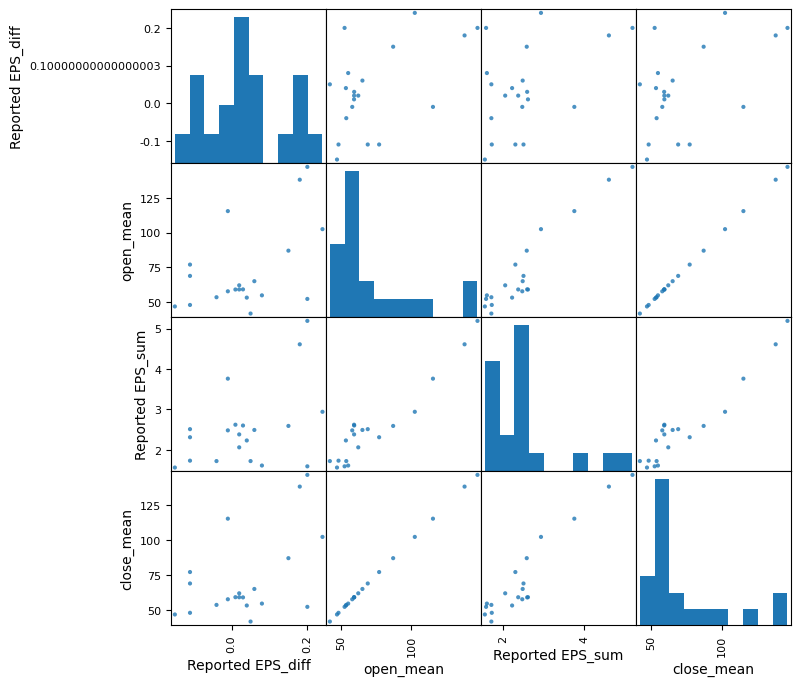

In [433]:
from pandas.plotting import scatter_matrix

#산점도 그리기

scatter_matrix(price_earning[["Reported EPS_diff", "open_mean",
                              "Reported EPS_sum","close_mean"]],
               alpha=0.8, figsize=(8,8), diagonal="hist")

plt.show()

In [434]:
price_earning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              20 non-null     object 
 1   Reported EPS_sum   20 non-null     float64
 2   Reported EPS_diff  20 non-null     float64
 3   close_mean         20 non-null     float64
 4   open_mean          20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 932.0+ bytes


In [435]:
#상관계수 corr()
price_earning[["Reported EPS_diff", "open_mean",
                              "Reported EPS_sum","close_mean"]].corr()

,Reported EPS_diff,open_mean,Reported EPS_sum,close_mean
Reported EPS_diff,1.000000,0.521762,0.461195,0.520401
open_mean,0.521762,1.000000,0.946229,0.999983
Reported EPS_sum,0.461195,0.946229,1.000000,0.945998
close_mean,0.520401,0.999983,0.945998,1.000000


In [ ]:
price_earning.rename({"Reported EPS_diff" : "Reported_EPS_diff",
                      "Reported EPS_sum" : "Reported_EPS_sum"}, axis=1, inplace=True)

In [446]:
price_earning.head()

,month,Reported_EPS_sum,Reported_EPS_diff,close_mean,open_mean
0,2021-11,5.19,0.20,146.756643,147.242546
1,2021-08,4.61,0.18,138.371114,138.017340
2,2021-05,3.76,-0.01,115.427900,115.447525
3,2021-03,2.94,0.24,102.383718,102.473305
4,2020-11,2.59,0.15,87.169500,87.013525


In [ ]:
from statsmodels.formula.api import ols

#ols : 선형회귀모델 : 독립변수와 종속 변수간의 선형 관계 주정할 때 사용
# R-squared: 1에 가까우면 독립변수가 종속 변수의 변동을 거의 설명 가능 높을수록 강한 선형 관계 
# pvalue값이 0에 가까울수록 선형에 가깝다라고 해석 가능
model = ols("close_mean ~ Reported_EPS_sum + Reported_EPS_diff + open_mean",
    data=price_earning).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             close_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.723e+05
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           2.81e-36
Time:                        12:02:21   Log-Likelihood:                 7.7780
No. Observations:                  20   AIC:                            -7.556
Df Residuals:                      16   BIC:                            -3.573
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1037      0.124      0.838      0.415      -0.159       0.366
Reported_EPS_sum     -0.0828      0.134     -0.618      0.545      -0.367       0.202
Reported_EPS_diff    -0.5301      0.440     -1.204      0.246      -1.464       0.403
open_mean             1.0023      0.004    222.879      0.000       0.993       1.012
==============================================================================
Omnibus:                        2.518   Durbin-Watson:                   2.504
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                0.922
Skew:                          -0.044   Prob(JB):                        0.631
Kurtosis:                       4.048   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
model = ols("close_mean ~ Reported_EPS_sum", data=price_earning).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             close_mean   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     153.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           3.05e-10
Time:                        12:11:50   Log-Likelihood:                -73.526
No. Observations:                  20   AIC:                             151.1
Df Residuals:                      18   BIC:                             153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.8114      6.411     -0.283      0.781     -15.279      11.657
Reported_EPS_sum    29.3116      2.368     12.381      0.000      24.338      34.286
==============================================================================
Omnibus:                        1.333   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.858
Skew:                          -0.034   Prob(JB):                        0.651
Kurtosis:                       1.987   Cond. No.                         8.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pickle
#생성형 모델 저장
pickle.dump(model, open("./data/model.pickle","wb"))

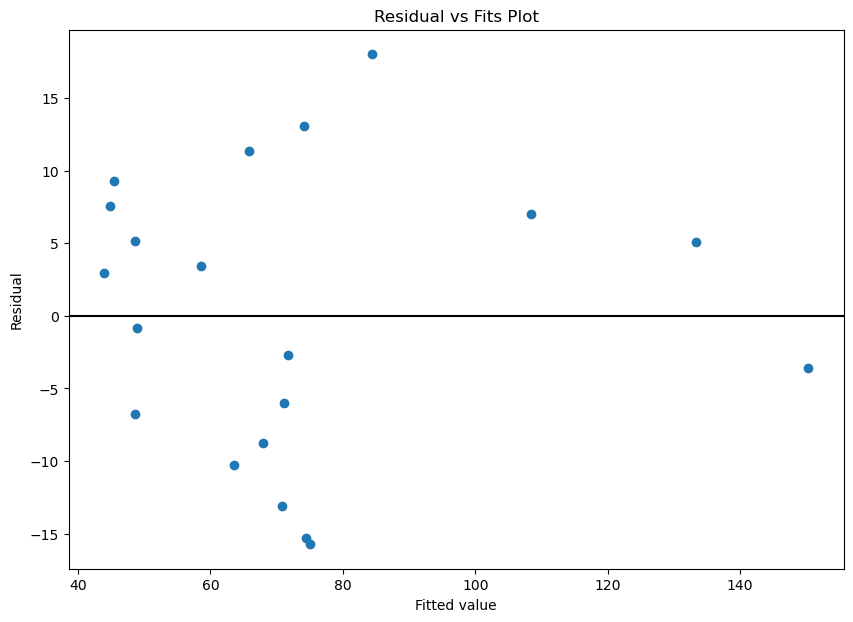

In [ ]:
fitted = model.fittedvalues #y(종속변수)의 예측값
resid = model.resid # 잔차 (실제값과 예측값 차이)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(fitted, resid) #x축 fitted, y축 잔차
ax.axhline(y=0, color="black", linestyle="solid") #수평선 추가
ax.set(xlabel="Fitted value", ylabel="Residual", title = "Residual vs Fits Plot")
plt.show()

In [ ]:
# 독립변수(x) : 원인변수, 설명변수라고 하며 다른 변수에 영향을 미치는 원인이 됨
# 종속변수(y) : 결과변수라고 하며, 독립변수의 영향을 받아 일정하게 변화

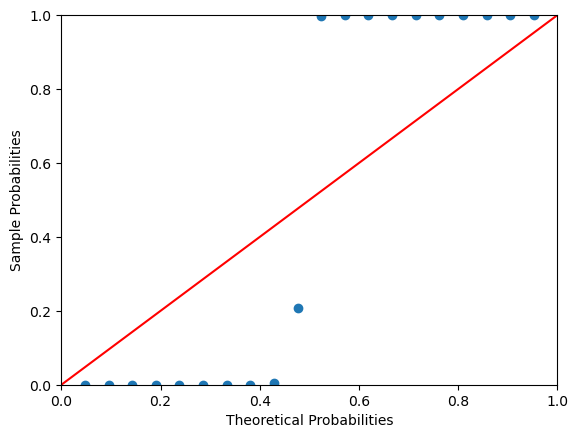

In [ ]:
#정규성 확인 : porplot

import statsmodels.api as sm

residuals = model.resid
pplot = sm.ProbPlot(residuals) 
fig = pplot.ppplot(line="45") # 두 개의 데이터의 중심 및 분포가 얼마나 일치하는 보는 그래프
plt.show()


In [466]:
import numpy as np

arr = np.array([[1,2],[2,1]])
arr

array([[1, 2],
       [2, 1]])

In [464]:
x = price_earning[["Reported_EPS_diff", "open_mean","Reported_EPS_sum"]].values

y = price_earning[["close_mean"]].values

type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [467]:
arr.shape, x.shape, y.shape

((2, 2), (20, 3), (20, 1))

In [470]:
x_t = x.transpose()
x_t.shape

(3, 20)

In [472]:
arr + np.array([[1,0],
               [0,1]])

array([[2, 2],
       [2, 2]])

In [473]:
arr - np.array([[1,0],
               [0,1]])

array([[0, 2],
       [2, 0]])

In [474]:
arr * np.array([[1,0],
               [0,1]])

array([[1, 0],
       [0, 1]])

In [476]:
arr / np.array([[2,1],
               [1,2]])

array([[0.5, 2. ],
       [2. , 0.5]])

In [478]:
#일반적인 행렬의 곱은 
np.matmul(arr, np.array([[1,0],[0,1]]))

array([[1, 2],
       [2, 1]])

In [ ]:
#1로만 이루어진 행렬
np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [491]:
# np.ones((x.shape[0],1)) : 행의 개수가 같은 m*1 행렬 생성
# axis=1 : 열의 방향으로 데이터를 결합 (가로) 
# axis=0 : 행의 방향으로 데이터를 결합 (세로) 
np.concatenate((np.ones((x.shape[0],1)),x), axis=1)

array([[ 1.00000000e+00,  2.00000000e-01,  1.47242546e+02,
         5.19000000e+00],
       [ 1.00000000e+00,  1.80000000e-01,  1.38017340e+02,
         4.61000000e+00],
       [ 1.00000000e+00, -1.00000000e-02,  1.15447525e+02,
         3.76000000e+00],
       [ 1.00000000e+00,  2.40000000e-01,  1.02473305e+02,
         2.94000000e+00],
       [ 1.00000000e+00,  1.50000000e-01,  8.70135254e+01,
         2.59000000e+00],
       [ 1.00000000e+00, -1.10000000e-01,  7.69960236e+01,
         2.31000000e+00],
       [ 1.00000000e+00, -1.10000000e-01,  6.88682507e+01,
         2.51000000e+00],
       [ 1.00000000e+00,  1.00000000e-02,  5.90830914e+01,
         2.62000000e+00],
       [ 1.00000000e+00,  6.00000000e-02,  6.50639246e+01,
         2.49000000e+00],
       [ 1.00000000e+00,  3.00000000e-02,  5.91796365e+01,
         2.60000000e+00],
       [ 1.00000000e+00, -1.00000000e-02,  5.77922727e+01,
         2.48000000e+00],
       [ 1.00000000e+00,  2.00000000e-02,  5.91166193e+01,
      

In [ ]:
#직접 선형 모델의 파라미터 계산

x_t = x.transpose()
x_t_x = np.matmul(x_t, x)
x_t_x_inv = np.linalg.inv(x_t_x) #주어진 행렬의 역행렬 구함
x_t_x_inv_x_t=np.matmul(x_t_x_inv, x_t)

coef = np.matmul(x_t_x_inv_x_t, y)
coef

array([[-0.6509427 ],
       [ 1.00241811],
       [-0.04815344]])

In [ ]:
#각 열의 평균과 분산을 구하는 코드 
# axis=1 : 열에 대한 계산 (행에 대해 반환)
# axis=0 : 행에 대한 계산 (각 열별로 반환)
np.mean(x, axis=0), np.var(x, axis=0)

(array([3.70000000e-02, 7.24531952e+01, 2.53500000e+00]),
 array([1.20810000e-02, 8.71432522e+02, 9.05425000e-01]))

In [ ]:
np.mean(x[:,0]), np.mean(x[:,1]), np.mean(x[:,2])

(0.037, 72.45319521157506, 2.5350000000000006)

In [500]:
np.array([[1,2],[2,1]]) +1

array([[2, 3],
       [3, 2]])

In [ ]:
x_mean = np.mean(x, axis=0)

x_mean.shape, x.shape

((3,), (20, 3))

In [512]:
x_center = x - x_mean
x_center.shape

(20, 3)

In [513]:
np.std(x, axis=0)

array([ 0.1099136 , 29.52003595,  0.95153823])

In [ ]:
#표준화
a = x_center / np.std(x, axis=0)
a.shape

(20, 3)

In [ ]:
# 특이값 분해 수행하는 함수 
u, s, v_t = np.linalg.svd(a) #3개의 행렬로 분해

In [517]:
s

array([6.80307133, 3.56309797, 1.01121382])

In [519]:
v = v_t.transpose()

In [522]:
transformed = np.matmul(a,v)
transformed[:2]

array([[-4.01913071,  0.46335668,  0.18742967],
       [-3.35964644,  0.30547165, -0.01863164]])

In [ ]:
from sklearn.decomposition import PCA
#PCA : 고차원 데이터를 저차원으로 투영하여 데이터의 중요한 패턴을 추출하고, 차원을 줄이는 기법

pca = PCA(n_components=3)#주성분 3개 설정
pca.fit(a)

PCA(n_components=3)

In [ ]:
# 선형대수 s값과 동일
# 데이터의 변동성의 크기 : 각 주성분에 해당하는 특이값 반환
pca.singular_values_

array([6.80307133, 3.56309797, 1.01121382])

In [ ]:
#선형대수 v값과 동일
# 주성분 방향을 나타는 벡터
pca.components_

array([[ 0.46775934,  0.63121601,  0.61868211],
       [ 0.88170792, -0.2844734 , -0.37638547],
       [ 0.06158193, -0.72155474,  0.68961325]])

In [ ]:
# 주성분 변환
#원본 데이터를 주성분 데이터로 변환
pca.transform(a)[:2]

array([[ 4.01913071, -0.46335668,  0.18742967],
       [ 3.35964644, -0.30547165, -0.01863164]])